In [42]:
# importing libraries
import keras
import numpy as np
from sklearn.preprocessing import StandardScaler
from numpy import loadtxt
from numpy import reshape
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras import metrics
from keras import backend as K
from keras.utils.vis_utils import plot_model
from matplotlib import pyplot

In [43]:
# custom R2-score metrics for keras backend
def r2_keras(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [44]:
# custom rmse metrics for keras backend
def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true))) 

In [45]:
# custom Magnitude of Relative Error metrics
def mre(y_actual, y_pred):
    res =  K.abs(y_actual - y_pred) / y_actual  
    return res

In [46]:
# setting numpy print option
np.set_printoptions(suppress=True)

In [47]:
# load the dataset
dataset = loadtxt('desharnais.csv', delimiter=',')
print(dataset.shape)

(77, 12)


In [48]:
# spliting train and test datasets
# defining split point
split = int(round(dataset.shape[0] * 0.8))
print('SPLIT POINT: %d' % split)
# separating data
train,test = dataset[:split,:],dataset[split:,:]
print('TRAIN SHAPE: %s' % (train.shape,))
print('TEST SHAPE: %s' % (test.shape,))
#print(test)

SPLIT POINT: 62
TRAIN SHAPE: (62, 12)
TEST SHAPE: (15, 12)


In [49]:
# selecting input and output values
# train
y_train = train[:,5]
print('TRAIN OUTPUT')
print(y_train)
X_train = np.delete(train, [0,3,5], axis=1)
print('TRAIN INPUT')
print(X_train)

# test
y_test = test[:,5]
print('TEST OUTPUT')
print(y_test)
X_test = np.delete(test, [0,3,5], axis=1)
print('TEST INPUT')
print(X_test)

TRAIN OUTPUT
[ 5152.  5635.   805.  3829.  2149.  2821.  2569.  3913.  7854.  2422.
  4067.  9051.  2282.  4172.  4977.  1617.  3192.  3437.  4494.   840.
 14973.  5180.  5775. 10577.  3983.  3164.  3542.  4277.  7252.  3948.
  3927.   710.  2429.  6405.   651.  9135.  1435.   847.  8050.  4620.
  2352.  2174.  6699. 14987.  4004. 12824.  2331.  5817.  2989.  3136.
 14434.  2583.  3647.  8232.  3276.  2723.  3472.  1575.  2926.  1876.
  2520.  1603.]
TRAIN INPUT
[[  1.   4.  12. 253.  52. 305.  34. 302.   1.]
 [  0.   0.   4. 197. 124. 321.  33. 315.   1.]
 [  4.   4.   1.  40.  60. 100.  18.  83.   1.]
 [  0.   0.   5. 200. 119. 319.  30. 303.   1.]
 [  0.   0.   4. 140.  94. 234.  24. 208.   1.]
 [  0.   0.   4.  97.  89. 186.  38. 192.   1.]
 [  2.   1.   9. 119.  42. 161.  25. 145.   2.]
 [  1.   2.  13. 186.  52. 238.  25. 214.   1.]
 [  3.   1.  12. 172.  88. 260.  30. 247.   1.]
 [  3.   4.   4.  78.  38. 116.  24. 103.   1.]
 [  4.   1.  21. 167.  99. 266.  24. 237.   1.]
 [  2

In [54]:
# standardize dataset
ss = StandardScaler()
# train standardize
sclXtrain = ss.fit(X_train)
X_train = sclXtrain.transform(X_train)
sclYtrain = ss.fit(y_train.reshape(-1,1))
y_train = sclYtrain.transform(y_train.reshape(-1,1))

# test standardize
sclXtest = ss.fit(X_test)
X_test = sclXtest.transform(X_test)
sclYtest = ss.fit(y_test.reshape(-1,1))
y_test = sclYtest.transform(y_test.reshape(-1,1))

# to get inverse transform
# X_train = sclXtrain.inverse_transform(X_train)
# y_train = sclYtrain.inverse_transform(y_train)
# X_test = sclXtest.inverse_transform(X_test)
# y_test = sclYtest.inverse_transform(y_test)

In [55]:
# define nn like livia proposed
model = Sequential()
model.add(Dense(64, input_dim=9))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))

In [56]:
# compile the keras model 4 metrics
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=[metrics.mse, metrics.mae, r2_keras, root_mean_squared_error])

In [12]:
# compile the keras model with one metric
# model.compile(loss='mean_absolute_error', optimizer='adam', metrics=[metrics.mse])

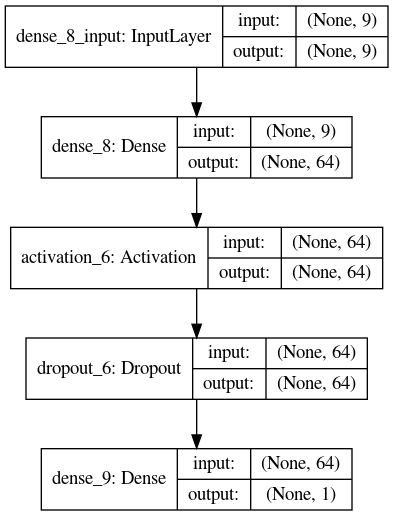

In [31]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [57]:
# fit the keras model on the dataset
# and
# evaluate the keras model

# model.fit(X_train, y_train, epochs=1000, batch_size=10, validation_split=0.2, verbose=0)
# _, accuracy = model.evaluate(X_train, y_train)
# print('Accuracy: %.2f' % (accuracy*100))

# fit model
history = model.fit(X_train, y_train, epochs=1000, batch_size=10, validation_split=0.2, verbose=0)

In [14]:
# for i in history.history:
#     print(i)

In [15]:
# evaluate the model 1 metric
# train_mae,train_mse = model.evaluate(X_train, y_train, verbose=0)
# test_mae,test_mse = model.evaluate(X_test, y_test, verbose=0)
# print('TRAIN | mae: %.3f, mse: %.3f' % (train_mae, train_mse))
# print('TEST  | mae: %.3f, mse: %.3f' % (test_mae, test_mse))

In [58]:
# evaluate the model 4 metrics
loss,train_mse,train_mae,train_r2,train_rmse = model.evaluate(X_train, y_train, verbose=0)
loss,test_mse,test_mae,test_r2,test_rmse = model.evaluate(X_test, y_test, verbose=0)
print('TRAIN | loss: %.3f, mse: %.3f, mae: %.3f, r2: %.3f rmse: %.3f' % (loss, train_mse, train_mae, train_r2, train_rmse))
print('TEST  | loss: %.3f, mse: %.3f, mae: %.3f, r2: %.3f rmse: %.3f' % (loss, test_mse, test_mae, test_r2, test_rmse))

TRAIN | loss: 0.406, mse: 0.228, mae: 0.261, r2: 0.773 rmse: 0.474
TEST  | loss: 0.406, mse: 0.234, mae: 0.406, r2: 0.766 rmse: 0.484


In [17]:
# making predictions
predicted = model.predict(X_test)
predicted = sclYtest.inverse_transform(predicted)
y_test = sclYtest.inverse_transform(y_test)
i = 0
for predic in predicted:
    actual = y_test[i]
    i+=1
    mre =  abs(actual - predic) / actual
    print('AC: %.2f PR: %.2f MRE: %.2f' % (actual,predic,mre))

AC: 3626.00 PR: 4414.64 MRE: 0.22
AC: 11361.00 PR: 9046.15 MRE: 0.20
AC: 1267.00 PR: 2916.85 MRE: 1.30
AC: 2548.00 PR: 2516.05 MRE: 0.01
AC: 1155.00 PR: 2870.98 MRE: 1.49
AC: 546.00 PR: 2132.55 MRE: 2.91
AC: 2275.00 PR: 3103.36 MRE: 0.36
AC: 9100.00 PR: 8989.26 MRE: 0.01
AC: 595.00 PR: 1887.72 MRE: 2.17
AC: 13860.00 PR: 11299.95 MRE: 0.18
AC: 1400.00 PR: 4334.92 MRE: 2.10
AC: 2800.00 PR: 10181.88 MRE: 2.64
AC: 9520.00 PR: 7877.92 MRE: 0.17
AC: 5880.00 PR: 4706.25 MRE: 0.20
AC: 23940.00 PR: 9614.87 MRE: 0.60


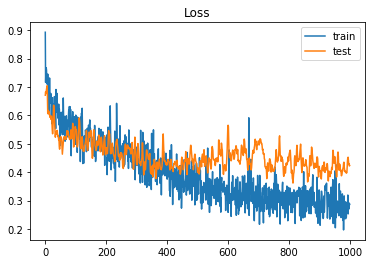

In [18]:
# plot loss
# pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

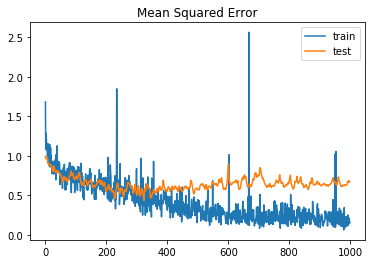

In [19]:
# plot mse
# pyplot.subplot(212)
pyplot.title('Mean Squared Error')
pyplot.plot(history.history['mean_squared_error'], label='train')
pyplot.plot(history.history['val_mean_squared_error'], label='test')
pyplot.legend()
pyplot.show()

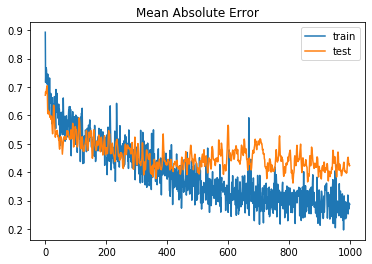

In [20]:
# plot mae
# pyplot.subplot(212)
pyplot.title('Mean Absolute Error')
pyplot.plot(history.history['mean_absolute_error'], label='train')
pyplot.plot(history.history['val_mean_absolute_error'], label='test')
pyplot.legend()
pyplot.show()

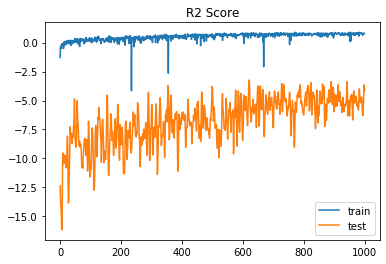

In [21]:
# plot r2 score
# pyplot.subplot(212)
pyplot.title('R2 Score')
pyplot.plot(history.history['r2_keras'], label='train')
pyplot.plot(history.history['val_r2_keras'], label='test')
pyplot.legend()
pyplot.show()